<a href="https://colab.research.google.com/github/kaneeshajain-001/ML-Projects/blob/main/Classification_assign_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cell type : CodeRead
import numpy as np
import matplotlib.pyplot as plt

Problem 1: Binary Classifiers

Problem 1.1: Build Binary Classifiers

In [ ]:
class NaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors =  np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y==c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)

        # return class with highest posterior probability
        return self._classes[np.argmax(posteriors)]


    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(- (x-mean)**2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

def Bayes1a(X_train, Y_train, X_test):
    """
    Perform LDA with known, identical covariance matrix (identity matrix).
    Arguments:
    X_train: numpy array of shape (n, 2)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m, 2)
    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    """
    model=NaiveBayes()
    model.fit(X_train, Y_train)
    Y_test_pred=model.predict(X_test)
    return np.array(Y_test_pred)


def Bayes1b(X_train, Y_train, X_test):
    """
    Perform LDA with identical, unknown covariance matrix.
    Arguments:
    X_train: numpy array of shape (n, 2)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m, 2)
    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    """
    # Calculate means
    mu_pos = np.mean(X_train[Y_train == 1], axis=0)
    mu_neg = np.mean(X_train[Y_train == -1], axis=0)

    # Estimate shared covariance matrix
    X_train_pos = X_train[Y_train == 1]
    X_train_neg = X_train[Y_train == -1]
    cov = (np.cov(X_train_pos.T) * len(X_train_pos) + np.cov(X_train_neg.T) * len(X_train_neg)) / len(X_train)
    inv_cov = np.linalg.inv(cov)

    # Prior probabilities
    pi_pos = np.mean(Y_train == 1)
    pi_neg = np.mean(Y_train == -1)

    # Discriminant function
    def discriminant(x, mu, inv_cov, pi):
        return np.dot(np.dot(x, inv_cov), mu) - 0.5 * np.dot(np.dot(mu.T, inv_cov), mu) + np.log(pi)

    # Predict
    Y_test_pred = []
    for x in X_test:
        d_pos = discriminant(x, mu_pos, inv_cov, pi_pos)
        d_neg = discriminant(x, mu_neg, inv_cov, pi_neg)
        Y_test_pred.append(1 if d_pos > d_neg else -1)

    return np.array(Y_test_pred)


def Bayes1c(X_train, Y_train, X_test):
    """
    Perform QDA with different, unknown covariance matrices.
    Arguments:
    X_train: numpy array of shape (n, 2)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m, 2)
    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    """
    # Calculate means
    mu_pos = np.mean(X_train[Y_train == 1], axis=0)
    mu_neg = np.mean(X_train[Y_train == -1], axis=0)

    # Estimate class-specific covariance matrices
    X_train_pos = X_train[Y_train == 1]
    X_train_neg = X_train[Y_train == -1]
    cov_pos = np.cov(X_train_pos.T)
    cov_neg = np.cov(X_train_neg.T)
    inv_cov_pos = np.linalg.inv(cov_pos)
    inv_cov_neg = np.linalg.inv(cov_neg)
    det_cov_pos = np.linalg.det(cov_pos)
    det_cov_neg = np.linalg.det(cov_neg)

    # Prior probabilities
    pi_pos = np.mean(Y_train == 1)
    pi_neg = np.mean(Y_train == -1)

    # Discriminant function
    def discriminant(x, mu, inv_cov, det_cov, pi):
        diff = x - mu
        return -0.5 * np.dot(np.dot(diff.T, inv_cov), diff) - 0.5 * np.log(det_cov) + np.log(pi)

    # Predict
    Y_test_pred = []
    for x in X_test:
        d_pos = discriminant(x, mu_pos, inv_cov_pos, det_cov_pos, pi_pos)
        d_neg = discriminant(x, mu_neg, inv_cov_neg, det_cov_neg, pi_neg)
        Y_test_pred.append(1 if d_pos > d_neg else -1)

    return np.array(Y_test_pred)

def accuracy_score(Y_test, Y_pred):
    correct=0
    for i in range(len(Y_test)):
      if Y_test[i]==Y_pred[i]:
        correct+=1

    return (correct/len(Y_test))



In [ ]:
#convenience
# Testing the functions above
# You may use the example here for testing syntax issues
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just
# solve the problem for this one example given below.)

X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)

Problem 1.2

<ipython-input-13-033ba9cf37d2>:65: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', marker='x', label='Test')


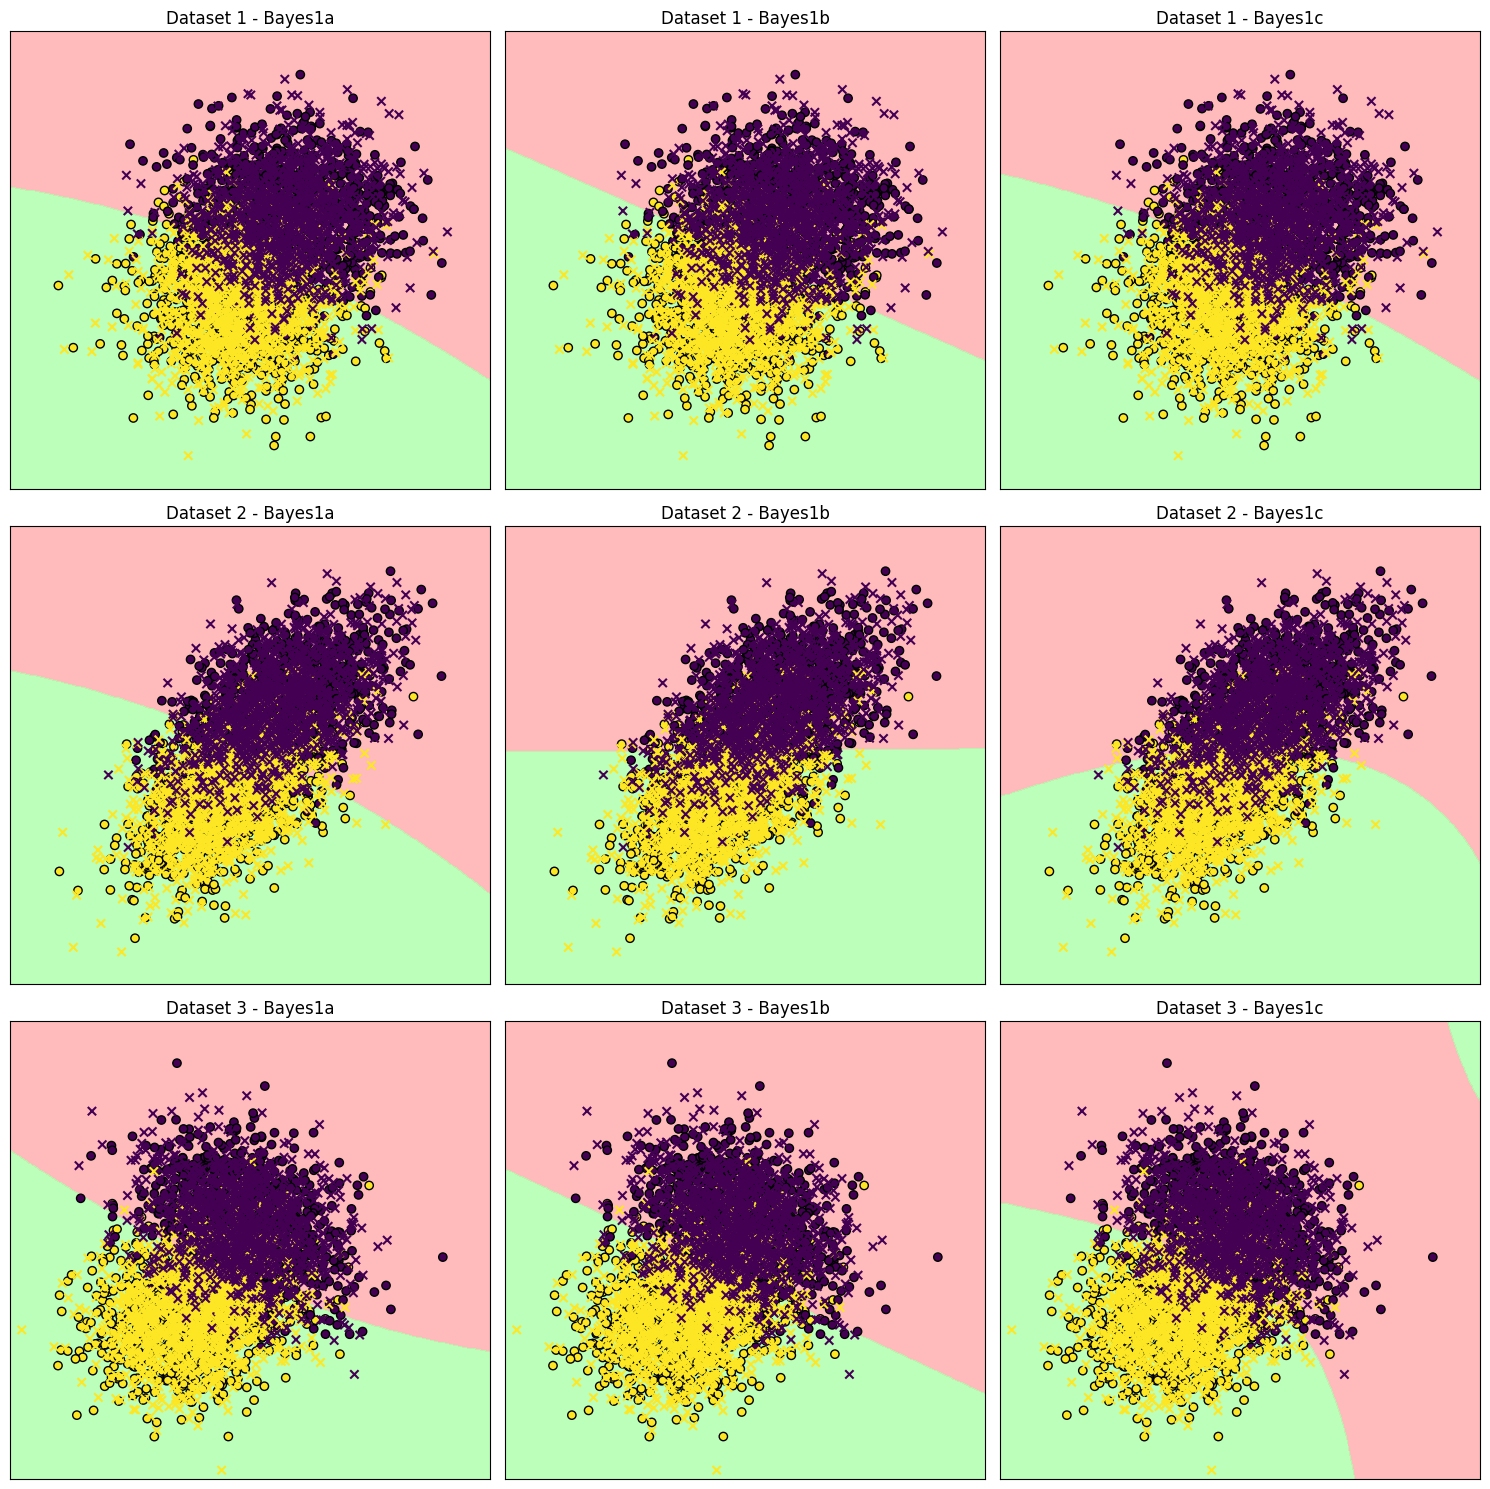

In [ ]:
# Cell type : CodeWrite
# Write the code for loading the data, running the three algos, and plotting here.

data = np.load('/content/dataset_1a.npz')
X_train1 = data['X_train']
Y_train1 = data['Y_train']
X_test1 = data['X_test']
Y_test1 = data['Y_test']

data = np.load('/content/dataset_1b.npz')
X_train2 = data['X_train']
Y_train2 = data['Y_train']
X_test2 = data['X_test']
Y_test2 = data['Y_test']

data = np.load('/content/dataset_1c.npz')
X_train3 = data['X_train']
Y_train3 = data['Y_train']
X_test3 = data['X_test']
Y_test3 = data['Y_test']

def evaluate_method(method, X_train, Y_train, X_test, Y_test):
    Y_pred = method(X_train, Y_train, X_test)
    return accuracy_score(Y_test, Y_pred)

# Evaluating
acc_part1_LDA1 = evaluate_method(Bayes1a, X_train1, Y_train1, X_test1, Y_test1)
acc_part1_LDA2 = evaluate_method(Bayes1b, X_train1, Y_train1, X_test1, Y_test1)
acc_part1_QDA3 = evaluate_method(Bayes1c, X_train1, Y_train1, X_test1, Y_test1)

acc_part2_LDA1 = evaluate_method(Bayes1a, X_train2, Y_train2, X_test2, Y_test2)
acc_part2_LDA2 = evaluate_method(Bayes1b, X_train2, Y_train2, X_test2, Y_test2)
acc_part2_QDA3 = evaluate_method(Bayes1c, X_train2, Y_train2, X_test2, Y_test2)

acc_part3_LDA1 = evaluate_method(Bayes1a, X_train3, Y_train3, X_test3, Y_test3)
acc_part3_LDA2 = evaluate_method(Bayes1b, X_train3, Y_train3, X_test3, Y_test3)
acc_part3_QDA3 = evaluate_method(Bayes1c, X_train3, Y_train3, X_test3, Y_test3)

# Predictions
Y_pred_test_1_1a = Bayes1a(X_train1, Y_train1, X_test1)
Y_pred_test_1_1b = Bayes1b(X_train1, Y_train1, X_test1)
Y_pred_test_1_1c = Bayes1c(X_train1, Y_train1, X_test1)

Y_pred_test_2_1a = Bayes1a(X_train2, Y_train2, X_test2)
Y_pred_test_2_1b = Bayes1b(X_train2, Y_train2, X_test2)
Y_pred_test_2_1c = Bayes1c(X_train2, Y_train2, X_test2)

Y_pred_test_3_1a = Bayes1a(X_train3, Y_train3, X_test3)
Y_pred_test_3_1b = Bayes1b(X_train3, Y_train3, X_test3)
Y_pred_test_3_1c = Bayes1c(X_train3, Y_train3, X_test3)

def plot_decision_boundary(ax, classifier, X_train, y_train, X_test, y_test, title):
    h = .02  # step size in the mesh
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = classifier(X_train, y_train, np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Use contourf with manual colors for positive and negative areas
    ax.contourf(xx, yy, Z, levels=[-1, 0, 1], colors=['#FFAAAA', '#AAFFAA'], alpha=0.8)
    scatter = ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o', label='Train')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', marker='x', label='Test')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    return scatter

# Plotting
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
plot_decision_boundary(axs[0, 0], Bayes1a, X_train1, Y_train1, X_test1, Y_test1, "Dataset 1 - Bayes1a")
plot_decision_boundary(axs[0, 1], Bayes1b, X_train1, Y_train1, X_test1, Y_test1, "Dataset 1 - Bayes1b")
plot_decision_boundary(axs[0, 2], Bayes1c, X_train1, Y_train1, X_test1, Y_test1, "Dataset 1 - Bayes1c")

# Dataset 2
plot_decision_boundary(axs[1, 0], Bayes1a, X_train2, Y_train2, X_test2, Y_test2, "Dataset 2 - Bayes1a")
plot_decision_boundary(axs[1, 1], Bayes1b, X_train2, Y_train2, X_test2, Y_test2, "Dataset 2 - Bayes1b")
plot_decision_boundary(axs[1, 2], Bayes1c, X_train2, Y_train2, X_test2, Y_test2, "Dataset 2 - Bayes1c")

# Dataset 3
plot_decision_boundary(axs[2, 0], Bayes1a, X_train3, Y_train3, X_test3, Y_test3, "Dataset 3 - Bayes1a")
plot_decision_boundary(axs[2, 1], Bayes1b, X_train3, Y_train3, X_test3, Y_test3, "Dataset 3 - Bayes1b")
plot_decision_boundary(axs[2, 2], Bayes1c, X_train3, Y_train3, X_test3, Y_test3, "Dataset 3 - Bayes1c")

plt.tight_layout()
plt.show()


Error rate:

| Model | Dataset_1a | Dataset_1b | Dataset_1c |
|-------|-----------------|-----------------|-----------------|
| Bayes1a | 0.136 | 0.1565 | 0.115 |
| Bayes1b | 0.1385 | 0.137 | 0.113 |
| Bayes1c | 0.1375 | 0.137 | 0.113 |

Obsevation:

(1) In dataset_1a: The least error rate is given by Bayes1a. The Bayes1a classifier assumes that covariance matrix = I i.e. the features are uncorrelated and have the same variance. Since the dataset is actually generated with an identity covariance matrix, Bayes1a's assumption aligns with the data's true distribution, making it the most suitable model for this scenario.  

(2) In dataset_1b: The least error rate is given by Bayes1b. The values in this dataset are normally distributed with a same unknown covariance. Since bayes1b uses LDA, its assumption of class-specific mean vectors and common covariance matrix cause bayes1b to outperform other functions.

(3) In dataset_1c: The least error rate is given by Bayes1c. The values in this dataset are normally distributed with different unknown covariance. Since bayes1c uses QDA, its assumption of class-specific mean vectors and class specific covariance causes it to outperform functions that assume either uncorrelated features or common covariance for both classes.

Problem 2: Multiclass Classifiers

Problem 2.1: Build Multiclass Classifiers

In [ ]:
def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances
    using assumption 2a.
    Arguments:
    X_train: numpy array of shape (n,2)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,2)
    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)

    """

    classes = np.unique(Y_train)
    n_classes = len(classes)
    n_features = X_train.shape[1]

    # Calculate means
    mu_dict = {}
    for k in classes:
      mu_dict[k] = np.mean(X_train[Y_train == k], axis=0)

    # Prior probabilities for each class
    pi_dict  ={}
    for k in classes:
      pi_dict[k] = np.mean(Y_train == k)

    # Discriminant function (with known covariance as identity matrix)
    # -0.5*x'*(sigma^-1)*x = -0.5*x'*x is constant across all the terms hence is not included.
    def delta(x, mu, pi):
        return np.dot(x, mu) - 0.5 * np.dot(mu, mu) + np.log(pi)

    # x belongs to the class k st delta_k(x) is maximum
    Y_test_pred = []
    for x in X_test:
        d = {}
        for k in classes:
          d[k] = delta(x, mu_dict[k], pi_dict[k])
        predicted_class = max(d, key=d.get)
        Y_test_pred.append(predicted_class)

    return np.array(Y_test_pred)



def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances
    using assumption 2b.
    Arguments:
    X_train: numpy array of shape (n,2)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,2)
    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)

    """
    classes = np.unique(Y_train)
    n_classes = len(classes)
    n = X_train.shape[1]

    # Calculate means
    mu_dict = {}
    for k in classes:
        mu_dict[k] = np.mean(X_train[Y_train == k], axis=0)

    # Prior probabilities for each class
    pi_dict  ={}
    for k in classes:
        pi_dict[k] = np.mean(Y_train == k)

   # Calculate unknown covariance matrix
    sigma = np.zeros((n, n))
    for k in classes:
        X_k = X_train[Y_train == k]
        # .cov already divides by len(x_k)-1 so we remultiply it.
        # row represents observations and column represents variables.
        sigma += np.cov(X_k, rowvar = False) * (len(X_k) - 1)
    sigma /= (len(X_train) - n_classes)

    sigma_inv = np.linalg.inv(sigma)
    sigma_det = np.linalg.det(sigma)

    # Discriminant function (with known covariance matrix sigma)
    def delta(x, mu, pi):
        diff = x - mu
        return -0.5 * np.dot(diff.T, np.dot(sigma_inv, diff)) - 0.5 * np.log(sigma_det) + np.log(pi)

    Y_test_pred = []
    for x in X_test:
        d = {}
        for k in classes:
            d[k] = delta(x, mu_dict[k], pi_dict[k])
        predicted_class = max(d, key=d.get)
        Y_test_pred.append(predicted_class)

    return np.array(Y_test_pred)


def Bayes2c(X_train, Y_train, X_test):

    """ Give Bayes classifier prediction for test instances
    using assumption 2c.
    Arguments:
    X_train: numpy array of shape (n,2)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,2)
    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)

    """

    classes = np.unique(Y_train)
    n_classes = len(classes)
    n = X_train.shape[1]

    # Calculate means and covariance matrices for each class
    mu_dict = {}
    sigma_dict = {}
    for k in classes:
        X_k = X_train[Y_train == k]
        mu_dict[k] = np.mean(X_k, axis = 0)
        sigma_dict[k] = np.cov(X_k, rowvar = False)

    # Prior probabilities for each class
    pi_dict = {}
    for k in classes:
        pi_dict[k] = np.mean(Y_train == k)

    # Discriminant function (with class-specific covariance matrices)
    def discriminant(x, mu, sigma, pi):
        sigma_inv = np.linalg.inv(sigma)
        sigma_det = np.linalg.det(sigma)
        diff = x - mu
        return -0.5 * np.dot(diff.T, np.dot(sigma_inv, diff)) - 0.5 * np.log(sigma_det) + np.log(pi)

    Y_test_pred = []
    for x in X_test:
        d = {}
        for k in classes:
            d[k] = discriminant(x, mu_dict[k], sigma_dict[k], pi_dict[k])
        predicted_class = max(d, key=d.get)
        Y_test_pred.append(predicted_class)

    return np.array(Y_test_pred)




In [ ]:
# Cell type : Convenience

# Testing the functions above

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000)))

X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000)))

Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)


Problem 2.2

<ipython-input-16-008038fa56e1>:51: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter_test = ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x', cmap=cmap, norm=norm, label='Test')


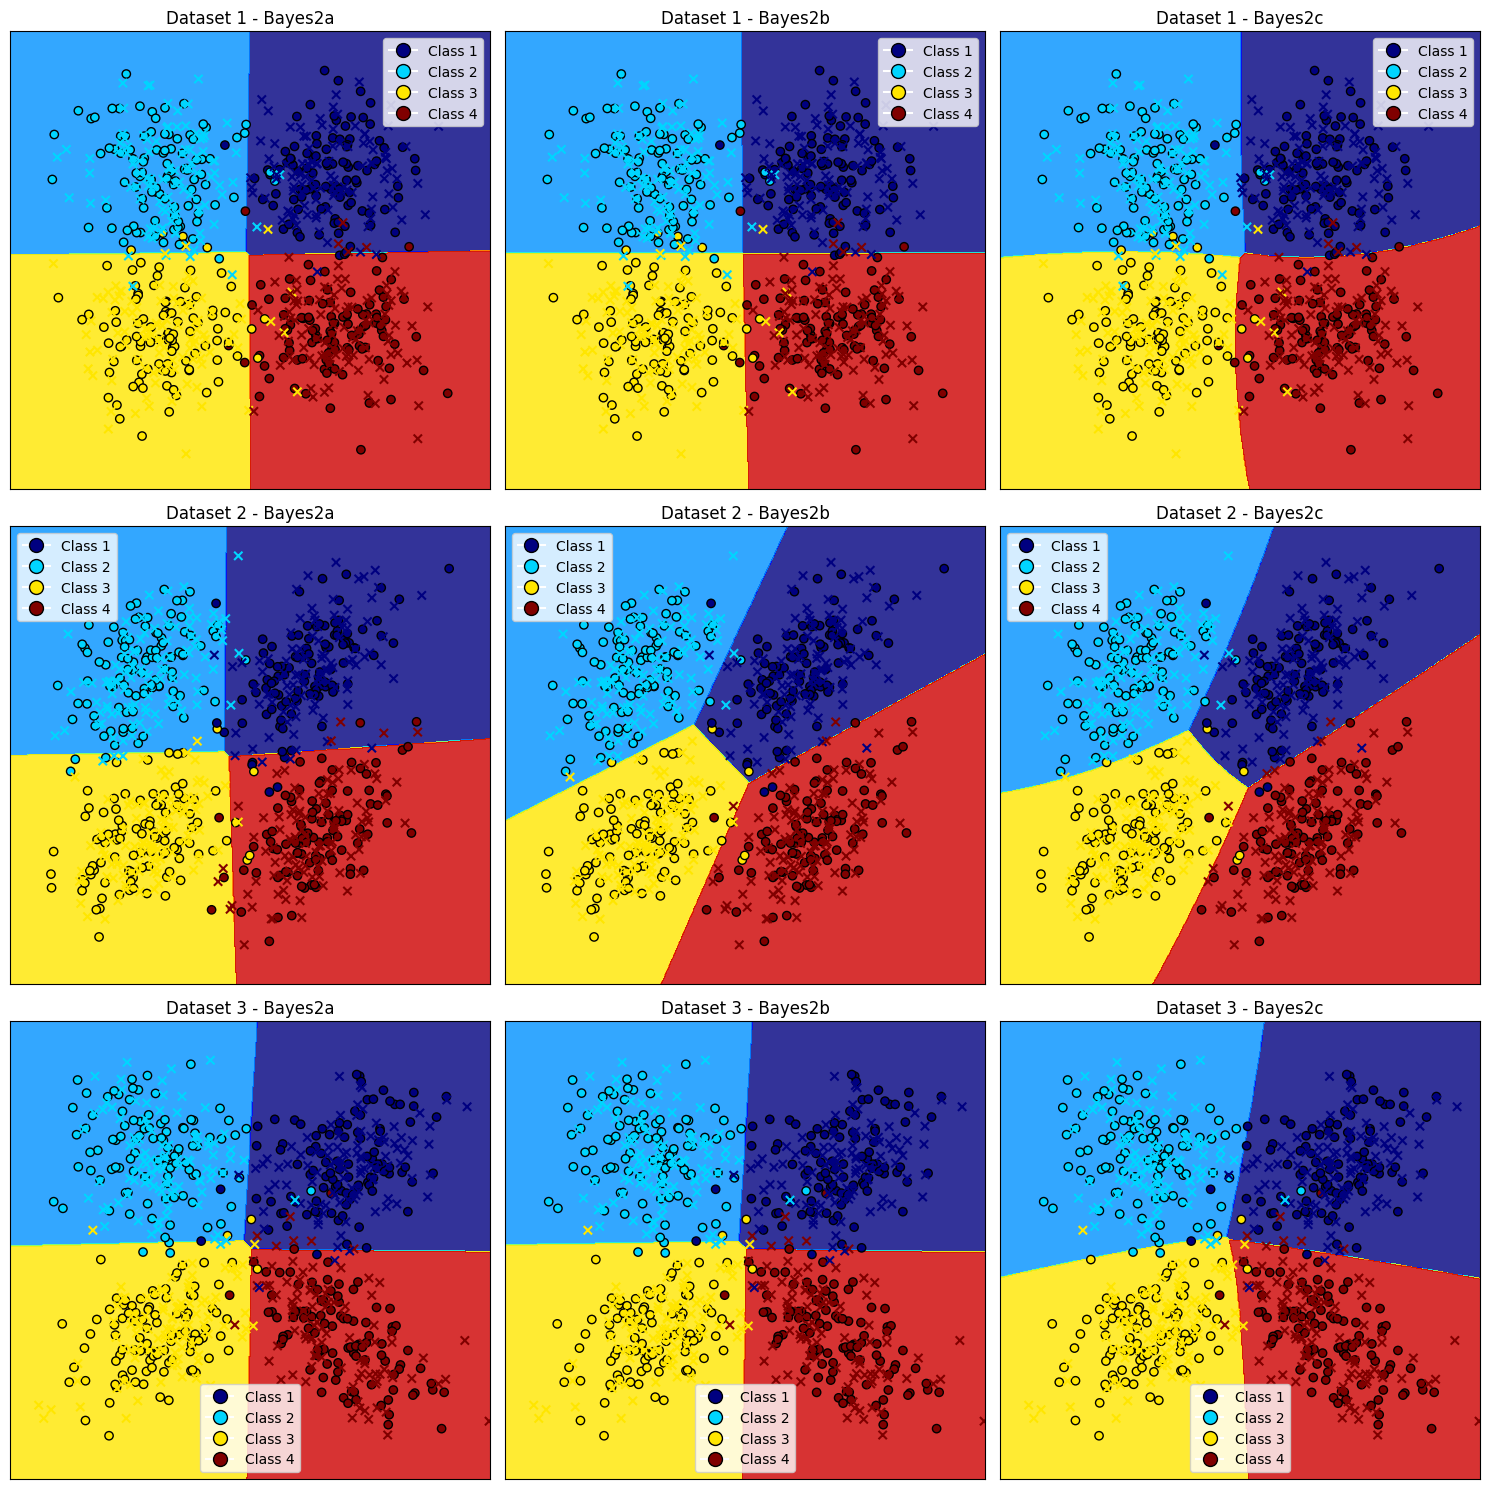

In [ ]:
data = np.load('/content/dataset_2a.npz')
X_train1 = data['X_train']
Y_train1 = data['Y_train']
X_test1 = data['X_test']
Y_test1 = data['Y_test']

data = np.load('/content/dataset_2b.npz')
X_train2 = data['X_train']
Y_train2 = data['Y_train']
X_test2 = data['X_test']
Y_test2 = data['Y_test']

data = np.load('/content/dataset_2c.npz')
X_train3 = data['X_train']
Y_train3 = data['Y_train']
X_test3 = data['X_test']
Y_test3 = data['Y_test']

def evaluate_method(method, X_train, Y_train, X_test, Y_test):
    Y_pred = method(X_train, Y_train, X_test)
    return accuracy_score(Y_test, Y_pred)

data1_2a = evaluate_method(Bayes2a, X_train1, Y_train1, X_test1, Y_test1)
data1_2b = evaluate_method(Bayes2b, X_train1, Y_train1, X_test1, Y_test1)
data1_2c = evaluate_method(Bayes2c, X_train1, Y_train1, X_test1, Y_test1)

data2_2a = evaluate_method(Bayes2a, X_train2, Y_train2, X_test2, Y_test2)
data2_2b = evaluate_method(Bayes2b, X_train2, Y_train2, X_test2, Y_test2)
data2_2c = evaluate_method(Bayes2c, X_train2, Y_train2, X_test2, Y_test2)

data3_2a = evaluate_method(Bayes2a, X_train3, Y_train3, X_test3, Y_test3)
data3_2b = evaluate_method(Bayes2b, X_train3, Y_train3, X_test3, Y_test3)
data3_2c = evaluate_method(Bayes2c, X_train3, Y_train3, X_test3, Y_test3)

def plot_decision_boundary(ax, classifier, X_train, y_train, X_test, y_test, title):
    h = .02  # step size in the mesh
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = classifier(X_train, y_train, np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap = plt.cm.jet
    norm = plt.Normalize(vmin=Z.min(), vmax=Z.max())

    ax.contourf(xx, yy, Z, alpha=0.8, cmap=cmap, norm=norm)

    scatter_train = ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', cmap=cmap, norm=norm, label='Train')
    scatter_test = ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x', cmap=cmap, norm=norm, label='Test')

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

    handles = []
    labels = []
    classes = np.unique(y_train)
    for cls in classes:
        handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(norm(cls)), markersize=10, markeredgecolor='k'))
        labels.append(f'Class {cls}')

    ax.legend(handles, labels, loc='best')
    return scatter_train, scatter_test

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

plot_decision_boundary(axs[0, 0], Bayes2a, X_train1, Y_train1, X_test1, Y_test1, "Dataset 1 - Bayes2a")
plot_decision_boundary(axs[0, 1], Bayes2b, X_train1, Y_train1, X_test1, Y_test1, "Dataset 1 - Bayes2b")
plot_decision_boundary(axs[0, 2], Bayes2c, X_train1, Y_train1, X_test1, Y_test1, "Dataset 1 - Bayes2c")

plot_decision_boundary(axs[1, 0], Bayes2a, X_train2, Y_train2, X_test2, Y_test2, "Dataset 2 - Bayes2a")
plot_decision_boundary(axs[1, 1], Bayes2b, X_train2, Y_train2, X_test2, Y_test2, "Dataset 2 - Bayes2b")
plot_decision_boundary(axs[1, 2], Bayes2c, X_train2, Y_train2, X_test2, Y_test2, "Dataset 2 - Bayes2c")

plot_decision_boundary(axs[2, 0], Bayes2a, X_train3, Y_train3, X_test3, Y_test3, "Dataset 3 - Bayes2a")
plot_decision_boundary(axs[2, 1], Bayes2b, X_train3, Y_train3, X_test3, Y_test3, "Dataset 3 - Bayes2b")
plot_decision_boundary(axs[2, 2], Bayes2c, X_train3, Y_train3, X_test3, Y_test3, "Dataset 3 - Bayes2c")

plt.tight_layout()
plt.show()

Error rate:

| Model | Dataset_2a | Dataset_2b | Dataset_2c |
|-------|-----------------|-----------------|-----------------|
| Bayes2a | 0.0475 | 0.0525 | 0.04 |
| Bayes2b | 0.0475 | 0.0225 | 0.04 |
| Bayes2c | 0.055 | 0.0225 | 0.0375 |

Obsevation:

(1) In dataset_2a: The least error rate is given by Bayes2a. This classifier assumes that covariance matrix = I i.e. the features are uncorrelated and all (unique) classes have the same variance. Since the dataset is actually generated with an identity covariance matrix, Bayes2a's assumption aligns with the data's true distribution, making it the most suitable model for this scenario.

(2) In dataset_2b: The least error rate is given by Bayes2b. The values in this dataset are normally distributed with a same unknown covariance. Since bayes2b uses LDA, its assumption of class-specific mean vectors and common covariance matrix cause bayes2b to outperform other functions.

(3) In dataset_2c: The least error rate is given by Bayes2c. The values in this dataset are normally distributed with different unknown covariance. Since bayes2c uses QDA, its assumption of class-specific mean vectors and class specific covariance causes it to outperform functions that assume either uncorrelated features or common covariance for all classes.


Question 3:
1. Data Collection
  - First we identify sources of data relevant to the classification problem and consolidate it (e.g., databases, APIs, web scraping).

  - Importance: The quantity, quality and relevance of the data will directly impact the model's performance. The number of features should be decided on the basis of their relevance to the defined problem. Sufficient and diverse data are necessary to train a robust model that generalizes the unseen data well. As the number of features increase, the model needs a higher data volume to learn from the multidimensional interactions.


2. Data Cleaning
  - Handle missing values (e.g., imputation(replacing missing data with substituted values), deletion).
  - Remove duplicates.
  - Correct errors and inconsistencies in the data (e.g., fixing typos, standardizing formats).

  - Importance: Clean data ensures that the model is trained on accurate and reliable information. Reduces noise and errors that could negatively affect model training and performance.

  - Handling Missing Data:
  1. using standard values like NA.
  2. Manually filling values(not recommended in case of large datasets).
  3. When data is normally distributed, the attribute's mean value can be used to replace the missing value. Whereas is non-normal distribution, median value of the attribute can be used.
  4. While using regression or decision tree algorithms, the missing value can be replaced by the most probable value.
  - Handling Noisy Data: Smoothiong out of data can be
  done in different ways -

   1. Binning - First, the data is sorted and then, the sorted values are separated and stored in the form of bins. Values in the bin are replaced by the mean/median/maximum/minimum value of the bin.
   2. Regression - It helps us to decide the variable which is suitable for our analysis.


3. Data Preprocessing
  - Data preprocessing is the most complex and time consuming part of data science. The aim is to process the raw data into a structured format for analysis.

  - Feature Engineering: Create new features or transform existing ones to better represent the underlying problem (e.g., encoding categorical variables using methods like one hot encoding, scaling numerical features).
  - Normalization/Standardization: Adjust feature scales to improve model convergence and performance. Otherwise we could run into the problem of exploding or vanishing gradients.
  - Splitting Data: Divide the data into training, validation, and test sets to evaluate model performance accurately, and adjust the weights and hyperparameters as needed.

  - Importance: Effective feature engineering can significantly improve model performance by providing better input representations. Proper data splitting ensures that the model's performance is evaluated on unseen data, providing a realistic estimate of its generalization capabilities.

4. Model Selection
  - Choose the type of models to be used for classification (e.g., logistic regression, decision trees, support vector machines, neural networks, naive bayes etc). Consider model complexity, interpretability, and the specific requirements of the problem (e.g., we use CNN for image classification).
  - We can select multiple models and then ensemble the weak learners to get better accuracy.

  - Importance: Different models have different strengths and weaknesses. Selecting the appropriate model is crucial for achieving good performance on the specific classification task.

5. Model Training
  - Train the selected models on the training data.
  - Optimize model parameters (e.g., weights in neural networks) using techniques like gradient descent, adam optimizer, adaboost etc.
  - Hyperparameter tuning using methods like grid search or random search to find the best set of hyperparameters.

  - Importance: Proper training and hyperparameter tuning are essential for optimizing model performance. Avoids underfitting (too simple model) and overfitting (too complex model) to ensure the model generalizes well.

6. Validation and Testing
  - Evaluate model performance on the validation set to tune hyperparameters and make model selection decisions.
  - Perform final evaluation on the test set to assess the model's generalization performance.

  - Importance: Validation helps in model selection and hyperparameter tuning without overfitting to the training data. Testing provides an unbiased evaluation of the final model's performance on unseen data, indicating how it will perform in real-world scenarios.

7. Model Deployment
  - Integrate the trained model into a production environment (e.g., web service, mobile app).
  - Implement necessary infrastructure for serving model predictions (e.g., APIs, deployment frameworks).

  - Importance: Deployment makes the model available for practical use, allowing it to generate predictions on new data in real-time or batch processing, it can also learn in realtime like chatgpt.

8. Monitoring and Maintenance
  - Continuously monitor model performance using metrics like accuracy, precision, recall, F1-score, confusion matrix, area under ROC curve etc.
  - Detect and address issues like data drift, where the input data distribution changes over time.
  - Update the model periodically with new data and re-train as necessary.

  - Importance: Ensures the model maintains high performance over time. Addresses any degradation in model performance due to changing data patterns, keeping the model relevant and effective.